In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

import pickle

In [48]:
#reading from pickle
with open('final_df_new.pkl', 'rb') as f:
    df = pickle.load(f)

In [55]:
#writting to pickle
#with open('final_df_new.pkl', "wb") as f:
#    pickle.dump(df, f)

In [35]:
df.columns

Index(['track_id', 'album_name', 'artists', 'track_name', 'release_date',
       'track_genre', 'duration_ms', 'explicit', 'href', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'preview_url', 'popularity'],
      dtype='object')

  0%|          | 0/114 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

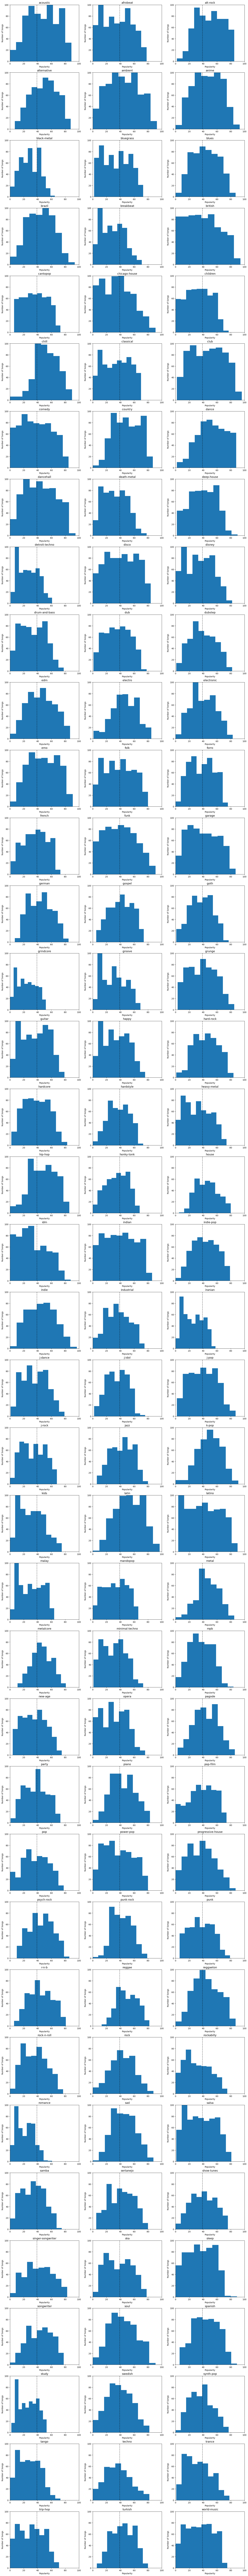

In [51]:
#plotting populairty distribtuion by genre
plt.figure()
plt.subplots(38,3,figsize=(20,220))

for x in tqdm(range(114)):
    plt.subplot(38,3,x+1)
    
   
    plt.hist(df[df['track_genre'] == df['track_genre'].unique()[x]]['popularity'], bins=10)
    plt.title(df['track_genre'].unique()[x],fontsize=13)
    plt.axvline(np.median(df['popularity']), linestyle='--', color='black', alpha=0.6)
    plt.xlabel('Popularity')
    plt.ylabel('Number of Songs')
    plt.xlim(0,100)
    plt.ylim(0,100)
    
plt.show()   

In [30]:
gen_counts = df.groupby('track_genre').count()['track_id'].to_frame()

In [58]:
#All tracks are unique tracks
df.shape[0] == df['track_id'].nunique()

True

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61887 entries, 0 to 61940
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          61887 non-null  object 
 1   album_name        61887 non-null  object 
 2   artists           61887 non-null  object 
 3   track_name        61887 non-null  object 
 4   release_date      61887 non-null  object 
 5   track_genre       61887 non-null  object 
 6   duration_ms       61887 non-null  int64  
 7   explicit          61887 non-null  bool   
 8   href              61887 non-null  object 
 9   danceability      61887 non-null  float64
 10  energy            61887 non-null  float64
 11  key               61887 non-null  int64  
 12  loudness          61887 non-null  float64
 13  mode              61887 non-null  int64  
 14  speechiness       61887 non-null  float64
 15  acousticness      61887 non-null  float64
 16  instrumentalness  61887 non-null  float6

In [53]:
df.columns

Index(['track_id', 'album_name', 'artists', 'track_name', 'release_date',
       'track_genre', 'duration_ms', 'explicit', 'href', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'preview_url', 'popularity'],
      dtype='object')

In [52]:
df.isna().sum()

track_id                0
album_name              0
artists                 0
track_name              0
release_date            0
track_genre             0
duration_ms             0
explicit                0
href                    0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
preview_url         12830
popularity              0
dtype: int64

<Figure size 640x480 with 0 Axes>

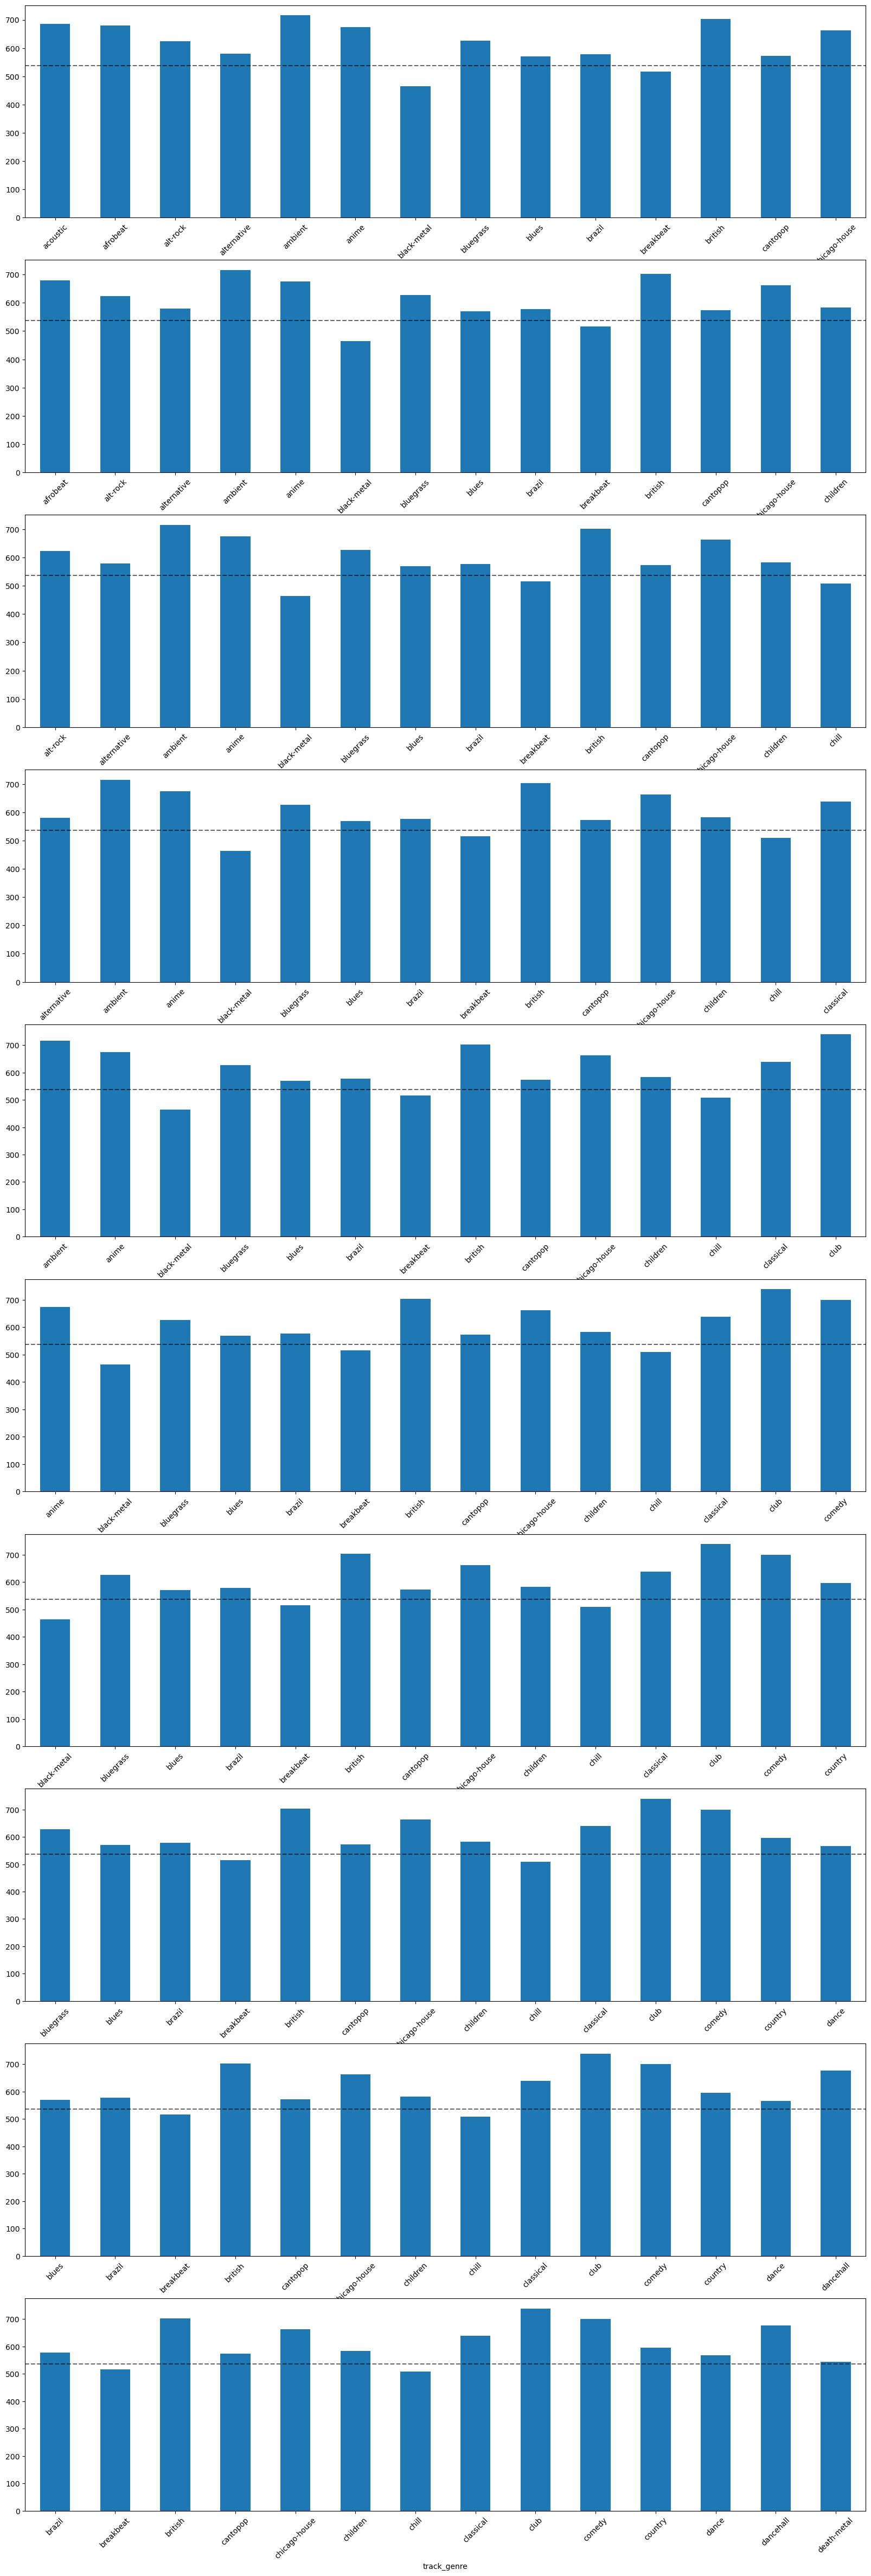

In [34]:
#plotting number of songs per genre
plt.figure()

plt.subplots(10,1,figsize=(20,60))
for x in range(10):
    plt.subplot(10,1,x+1)
    gen_counts.iloc[x:14+x,0].plot(kind='bar')
    plt.axhline(np.median(gen_counts['track_id']),linestyle='--', color='black', alpha=0.6)
    plt.xticks(rotation=45)
        
plt.show()